In [ ]:
!wget https://www.dropbox.com/s/b25egzfhezv3fp8/photos_tomatoes.zip?dl=0 -O data.zip
!unzip -q data.zip

--2020-05-19 11:39:27--  https://www.dropbox.com/s/b25egzfhezv3fp8/photos_tomatoes.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/b25egzfhezv3fp8/photos_tomatoes.zip [following]
--2020-05-19 11:39:28--  https://www.dropbox.com/s/raw/b25egzfhezv3fp8/photos_tomatoes.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc180722698ebfbb680000bb7f44.dl.dropboxusercontent.com/cd/0/inline/A4DS3ZBwMLTuYy_wiNNBUH2hoJ3XPcQmtm6jUGJMXVErgXq9Qt8tuhPiwS7a4SM7eTHyQh6mAljKLnDDNo0w_hPeKeSb2tr7vbmyoE9p4DnVvdQtcI8S2r5er-vG7nBnVDE/file# [following]
--2020-05-19 11:39:28--  https://uc180722698ebfbb680000bb7f44.dl.dropboxusercontent.com/cd/0/inline/A4DS3ZBwMLTuYy_wiNNBUH2hoJ3XPcQmtm6jUGJMXVErgXq9Qt8tuhPiwS7a4SM7eTHyQh6mAljKLnDDNo0w_hPe

In [ ]:
#https://stackoverflow.com/questions/54723141/segmentation-problem-for-tomato-leaf-images-in-plantvillage-dataset

In [ ]:
import os
import numpy as np
import cv2
from skimage import io
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

In [ ]:
folders_names = os.listdir('/content/')[1:-1]
#folders_names.remove('data.zip')
pics_names = os.listdir('/content/' + folders_names[0] +'/')

In [ ]:
folders_names.sort()

In [ ]:
folders_names.index("ImageSet_Sep_16_21_27_40")

465

In [ ]:
folders_names_sorted=folders_names[465:]
folders_names_sorted.remove('data.zip')
folders_names_sorted.extend(folders_names[0:465])
folders_names_sorted

['ImageSet_Sep_16_21_27_40',
 'ImageSet_Sep_16_21_59_59',
 'ImageSet_Sep_16_22_32_17',
 'ImageSet_Sep_16_23_04_35',
 'ImageSet_Sep_16_23_36_54',
 'ImageSet_Sep_17_00_09_12',
 'ImageSet_Sep_17_00_41_31',
 'ImageSet_Sep_17_01_13_49',
 'ImageSet_Sep_17_01_46_07',
 'ImageSet_Sep_17_02_18_25',
 'ImageSet_Sep_17_02_50_43',
 'ImageSet_Sep_17_03_23_01',
 'ImageSet_Sep_17_03_55_19',
 'ImageSet_Sep_17_04_27_37',
 'ImageSet_Sep_17_04_59_55',
 'ImageSet_Sep_17_05_32_13',
 'ImageSet_Sep_17_06_04_31',
 'ImageSet_Sep_17_06_36_49',
 'ImageSet_Sep_17_07_09_07',
 'ImageSet_Sep_17_07_41_24',
 'ImageSet_Sep_17_08_13_42',
 'ImageSet_Sep_17_08_46_00',
 'ImageSet_Sep_17_09_18_18',
 'ImageSet_Sep_17_09_50_36',
 'ImageSet_Sep_17_10_22_54',
 'ImageSet_Sep_17_10_55_12',
 'ImageSet_Sep_17_11_27_29',
 'ImageSet_Sep_17_11_59_47',
 'ImageSet_Sep_17_12_32_05',
 'ImageSet_Sep_17_13_04_23',
 'ImageSet_Sep_17_13_36_40',
 'ImageSet_Sep_17_14_08_58',
 'ImageSet_Sep_17_14_41_16',
 'ImageSet_Sep_17_15_13_34',
 'ImageSet_Sep

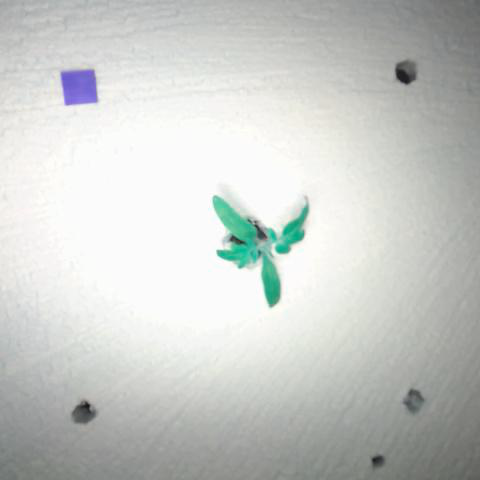

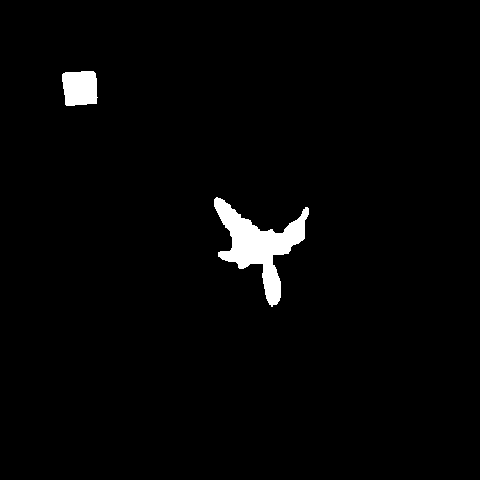

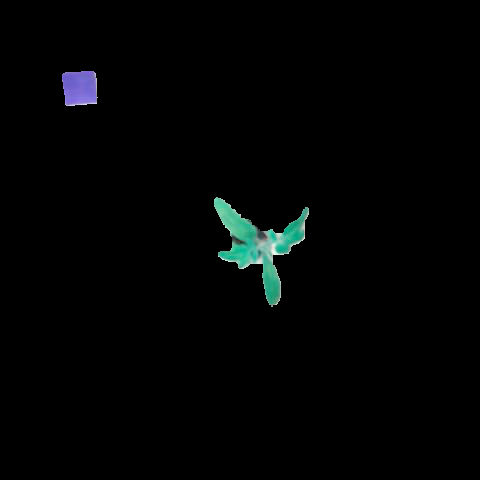

area of leafs:  3.357400722021661


In [ ]:
path = '/content/' + folders_names[0] + '/' + pics_names[0]
image = io.imread(path)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# set lower and upper color limits
low_val = (0,60,0)
high_val = (179,255,255)
# Threshold the HSV image
mask = cv2.inRange(hsv, low_val,high_val)
# remove noise
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel=np.ones((8,8),dtype=np.uint8))
# apply mask to original image
result = cv2.bitwise_and(image, image,mask=mask)
#show image
cv2_imshow(image)
cv2_imshow(mask)
cv2_imshow(result)
box_area = (mask[:150, :150]/255).sum()
leafs_area = (mask[150:, 150:]/255).sum()/ box_area
print('area of leafs: ', leafs_area)

In [ ]:
def area_count(path, box_area):
  image = io.imread(path)
  hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  # set lower and upper color limits
  low_val = (0,60,0)
  high_val = (179,255,255)
  # Threshold the HSV image
  mask = cv2.inRange(hsv, low_val,high_val)
  # remove noise
  mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel=np.ones((8,8),dtype=np.uint8))
  # apply mask to original image
  result = cv2.bitwise_and(image, image,mask=mask)

  leafs_area = ((mask/255).sum()- box_area)/ box_area
  return leafs_area

In [ ]:
pics_names

['photo3s.jpg',
 'photo1s.jpg',
 'photo2.jpg',
 'photo2s.jpg',
 'photo1.jpg',
 'photo4s.jpg',
 'photo3.jpg',
 'photo4.jpg']

In [ ]:
pics_names = ['photo1.jpg', 'photo2.jpg', 'photo3.jpg', 'photo4.jpg']

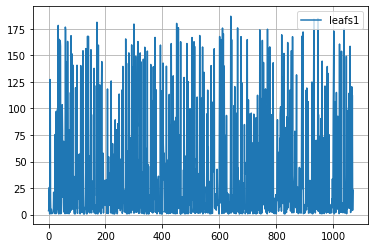

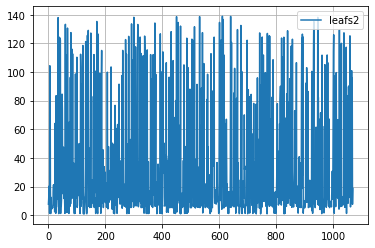

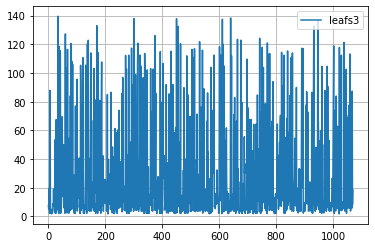

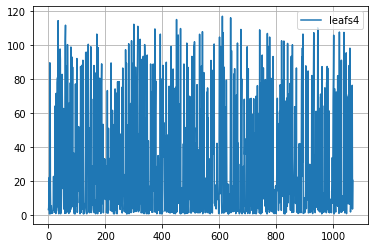

In [ ]:
dinamics = {}
for pic_name in pics_names:
  dinamics['leafs' + pic_name[-5]] = []
  for folder_name in folders_names:
      path = '/content/' + folder_name + '/' + pic_name
      leafs_area = area_count(path, box_area)
      #print(pic_name, folder_name, leafs_area)
      dinamics['leafs' + pic_name[-5]].append(leafs_area)

  plt.plot(dinamics['leafs' + pic_name[-5]], label = 'leafs' + pic_name[-5])
  plt.legend()
  plt.grid()
  plt.show()